In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts import gchemplots as gp

In [12]:
# Read in data
data = pd.read_excel('published/Vasey_CaucArc_TableS4.xlsx',header=1)
spreading_cond1 = data['Region'].isin(['Okinawa Trough','Bransfield Strait','Tyrrhenian Sea','Greater Caucasus'])
spreading_cond2 = data['Source']!='Hess et al., 1995'
spreading_data = data[spreading_cond1 & spreading_cond2]

# Make groups
groups = spreading_data.groupby('Region')

# Set colors
color_dict = {'Okinawa Trough':'purple','Bransfield Strait':'red','Tyrrhenian Sea':'orange','Greater Caucasus':'blue'}
axes_dict = {'Okinawa Trough':1,'Bransfield Strait':0,'Tyrrhenian Sea':2,'Greater Caucasus':3}

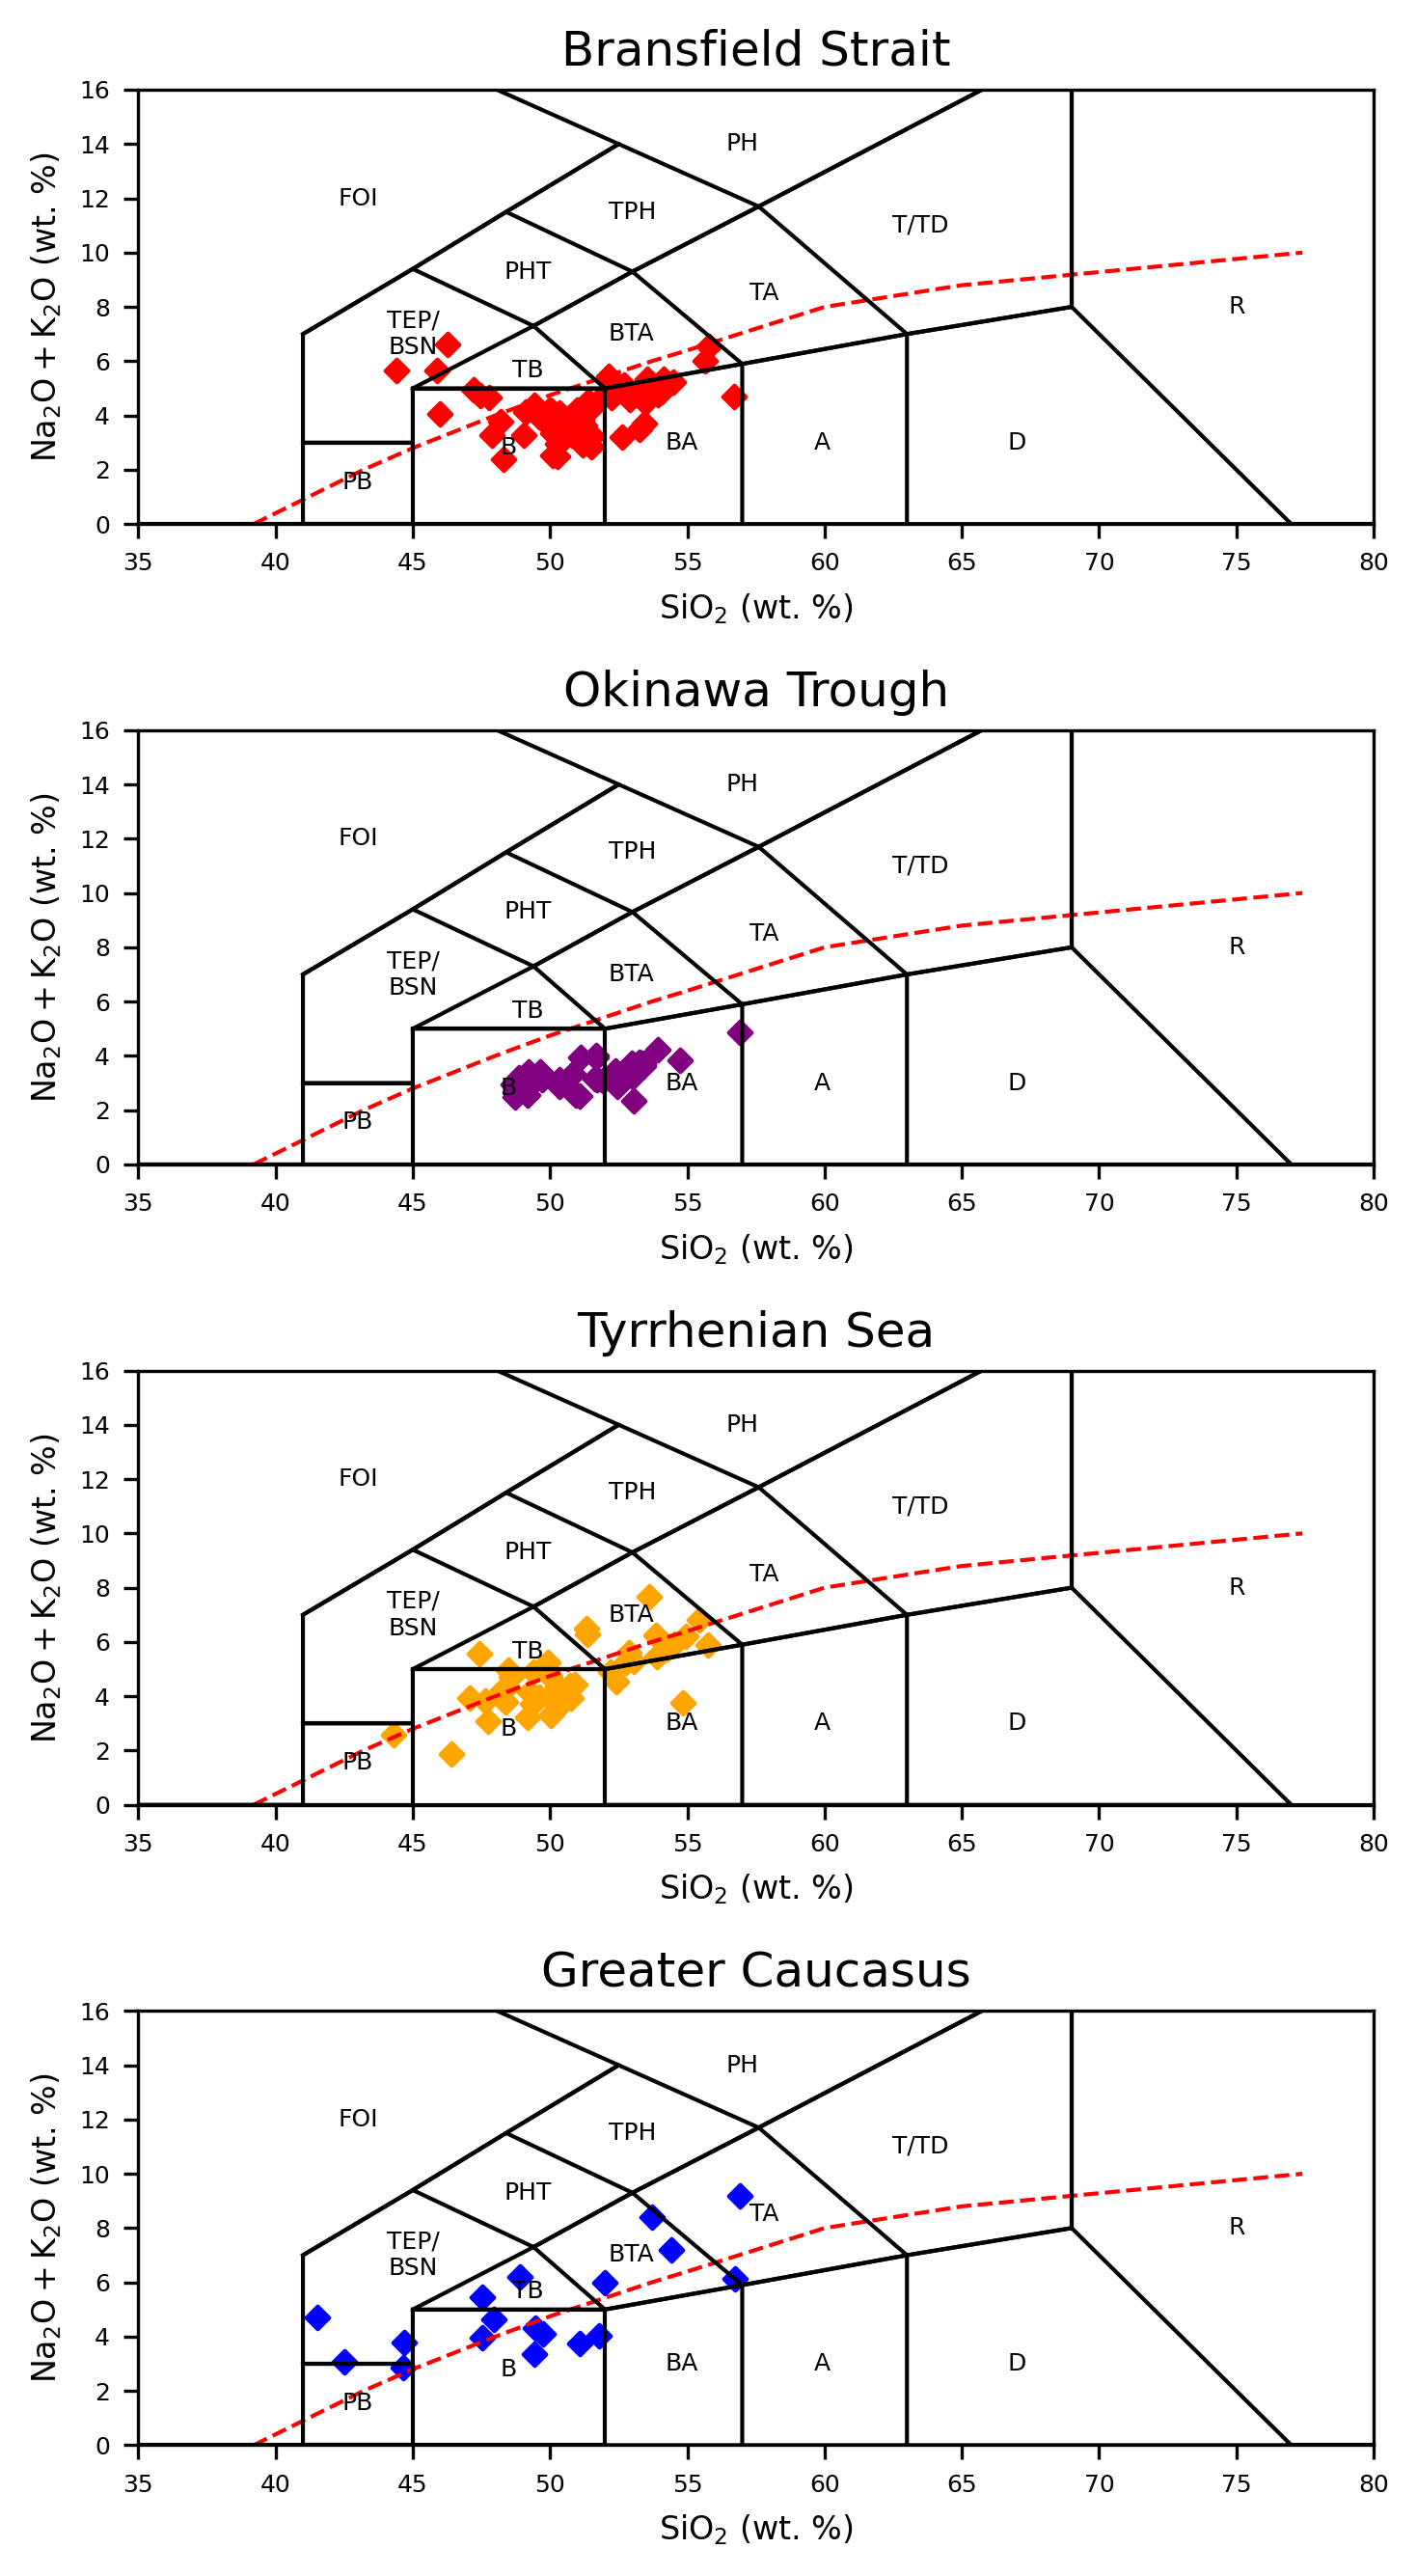

In [13]:
# TAS

fig,axs = plt.subplots(4,dpi=300,figsize=(5,9))

for k, group in groups:
    ax = axs[axes_dict[k]]
    color = color_dict[k]
    SiO2,Na2O,K2O = group[['SiO2','Na2O','K2O']].T.values
    gp.TASsm(SiO2,Na2O,K2O,label=k,ax=ax,color=color,first=[])
    ax.set_title(k)

plt.tight_layout()
fig.savefig('TAS_cbab.pdf')

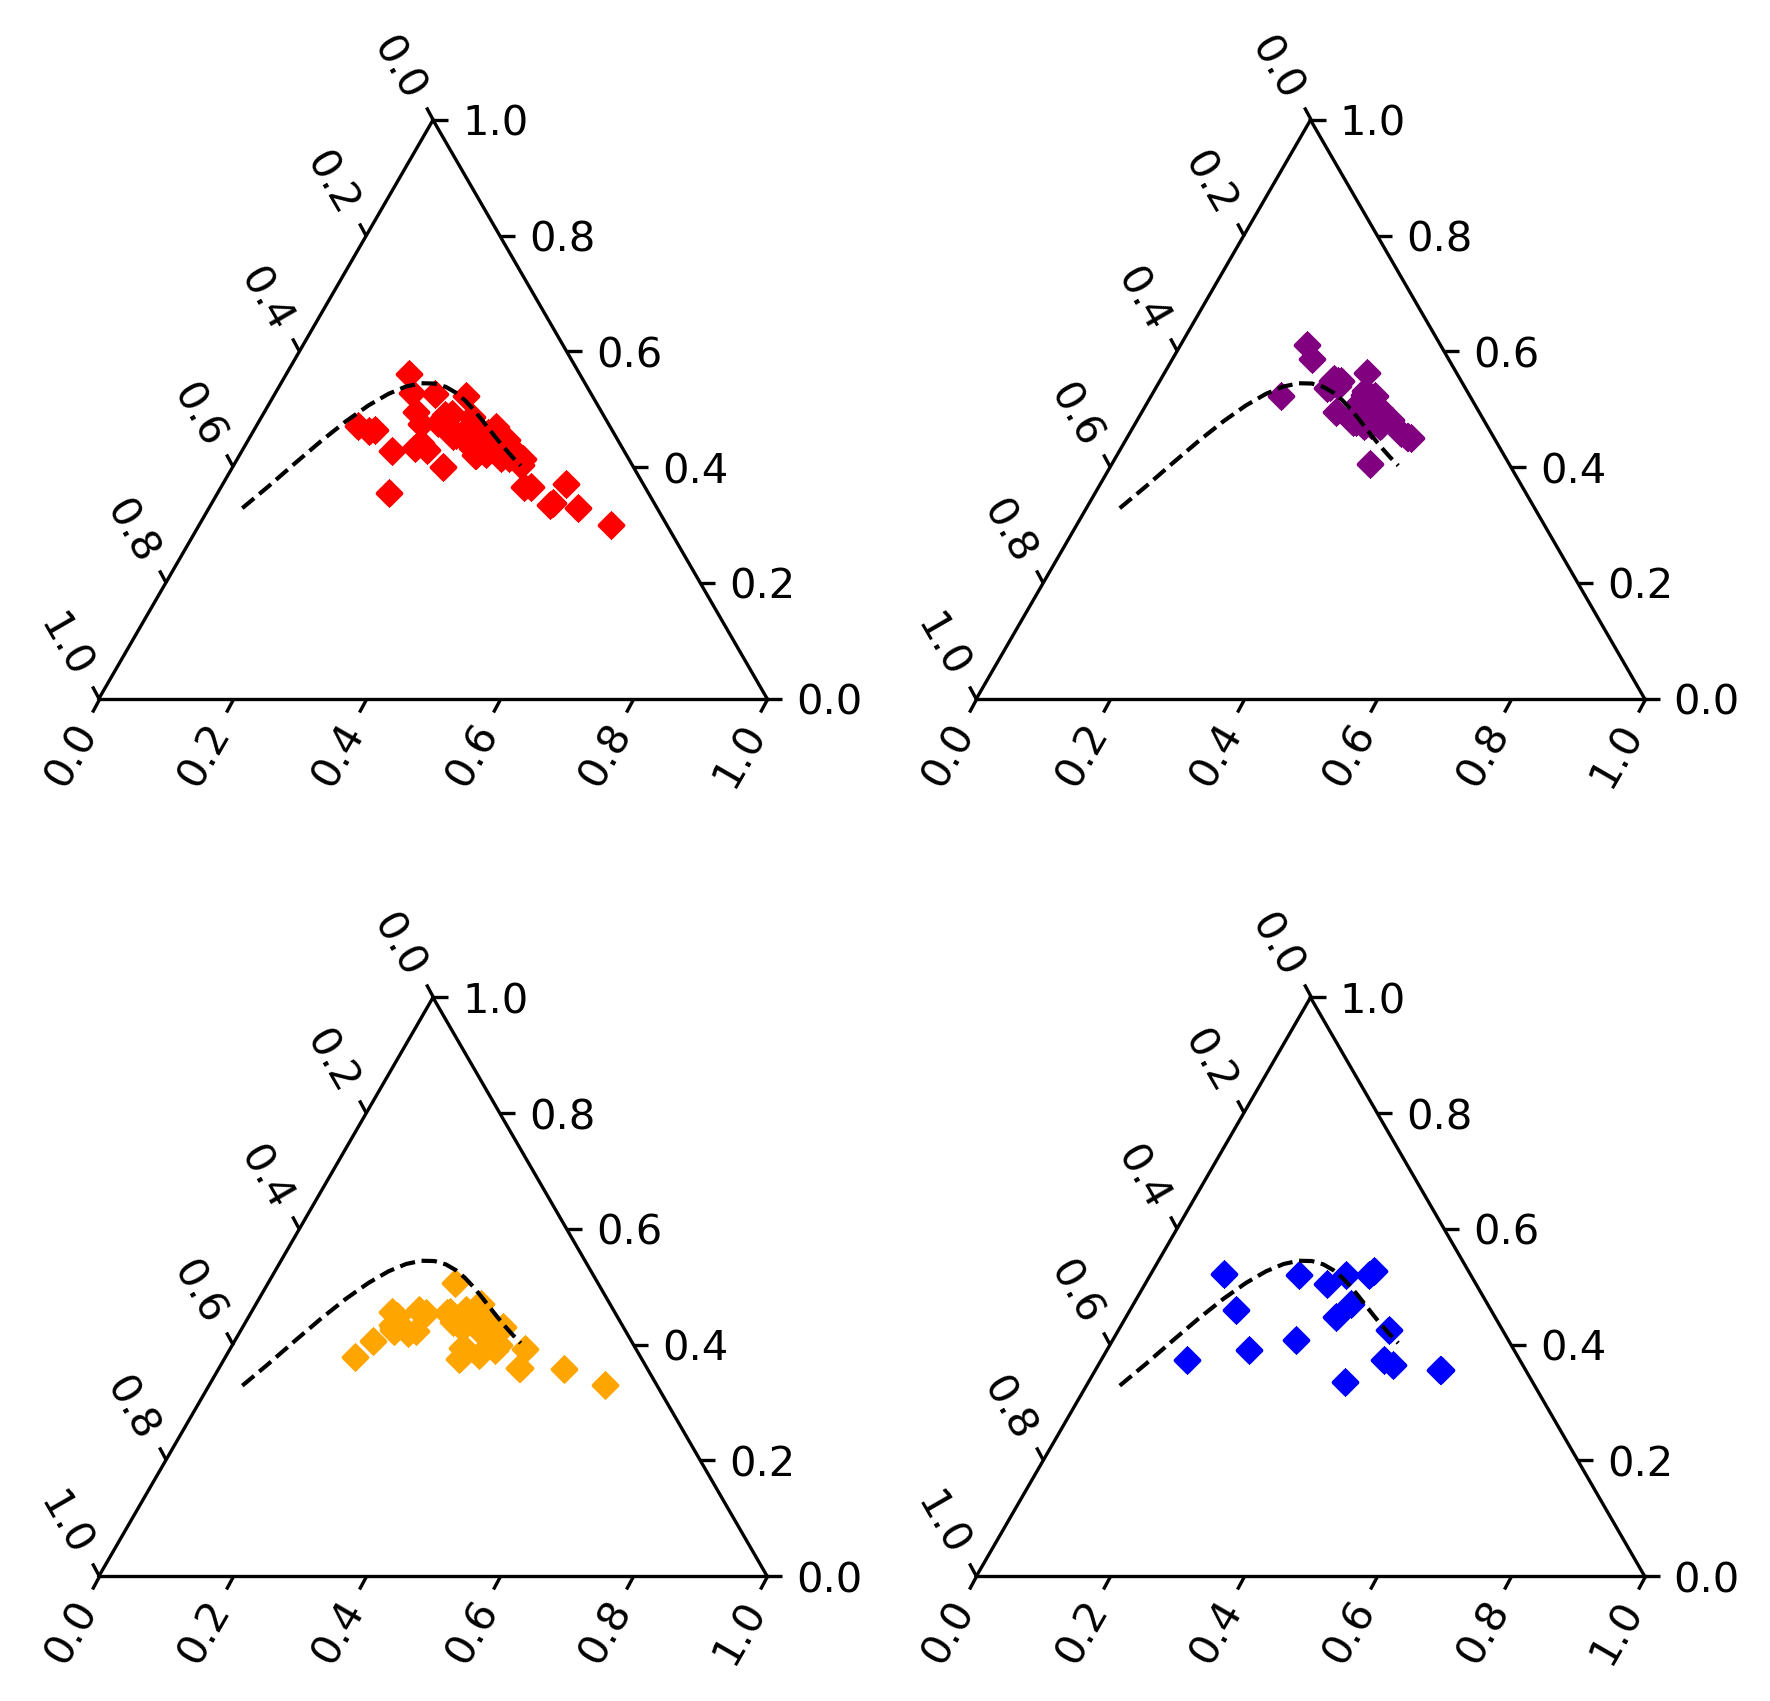

In [14]:
#AFM
fig = plt.figure(dpi=300,figsize=(6,6))
ax0 = fig.add_subplot(221,projection='ternary')
ax1 = fig.add_subplot(222,projection='ternary')
ax2 = fig.add_subplot(223,projection='ternary')
ax3 = fig.add_subplot(224,projection='ternary')

axs = [ax0,ax1,ax2,ax3]

for k, group in groups:
    Na2O,K2O,MgO,FeOt = group[['Na2O','K2O','MgO','FeOt']].T.values
    gp.afm(Na2O=Na2O,K2O=K2O,MgO=MgO,FeOt=FeOt,ax=axs[axes_dict[k]],label=k,color=color_dict[k],first=[])

plt.tight_layout()
fig.savefig('afm_cbab.pdf')

4
4
4
4
4


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


4
4
4


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


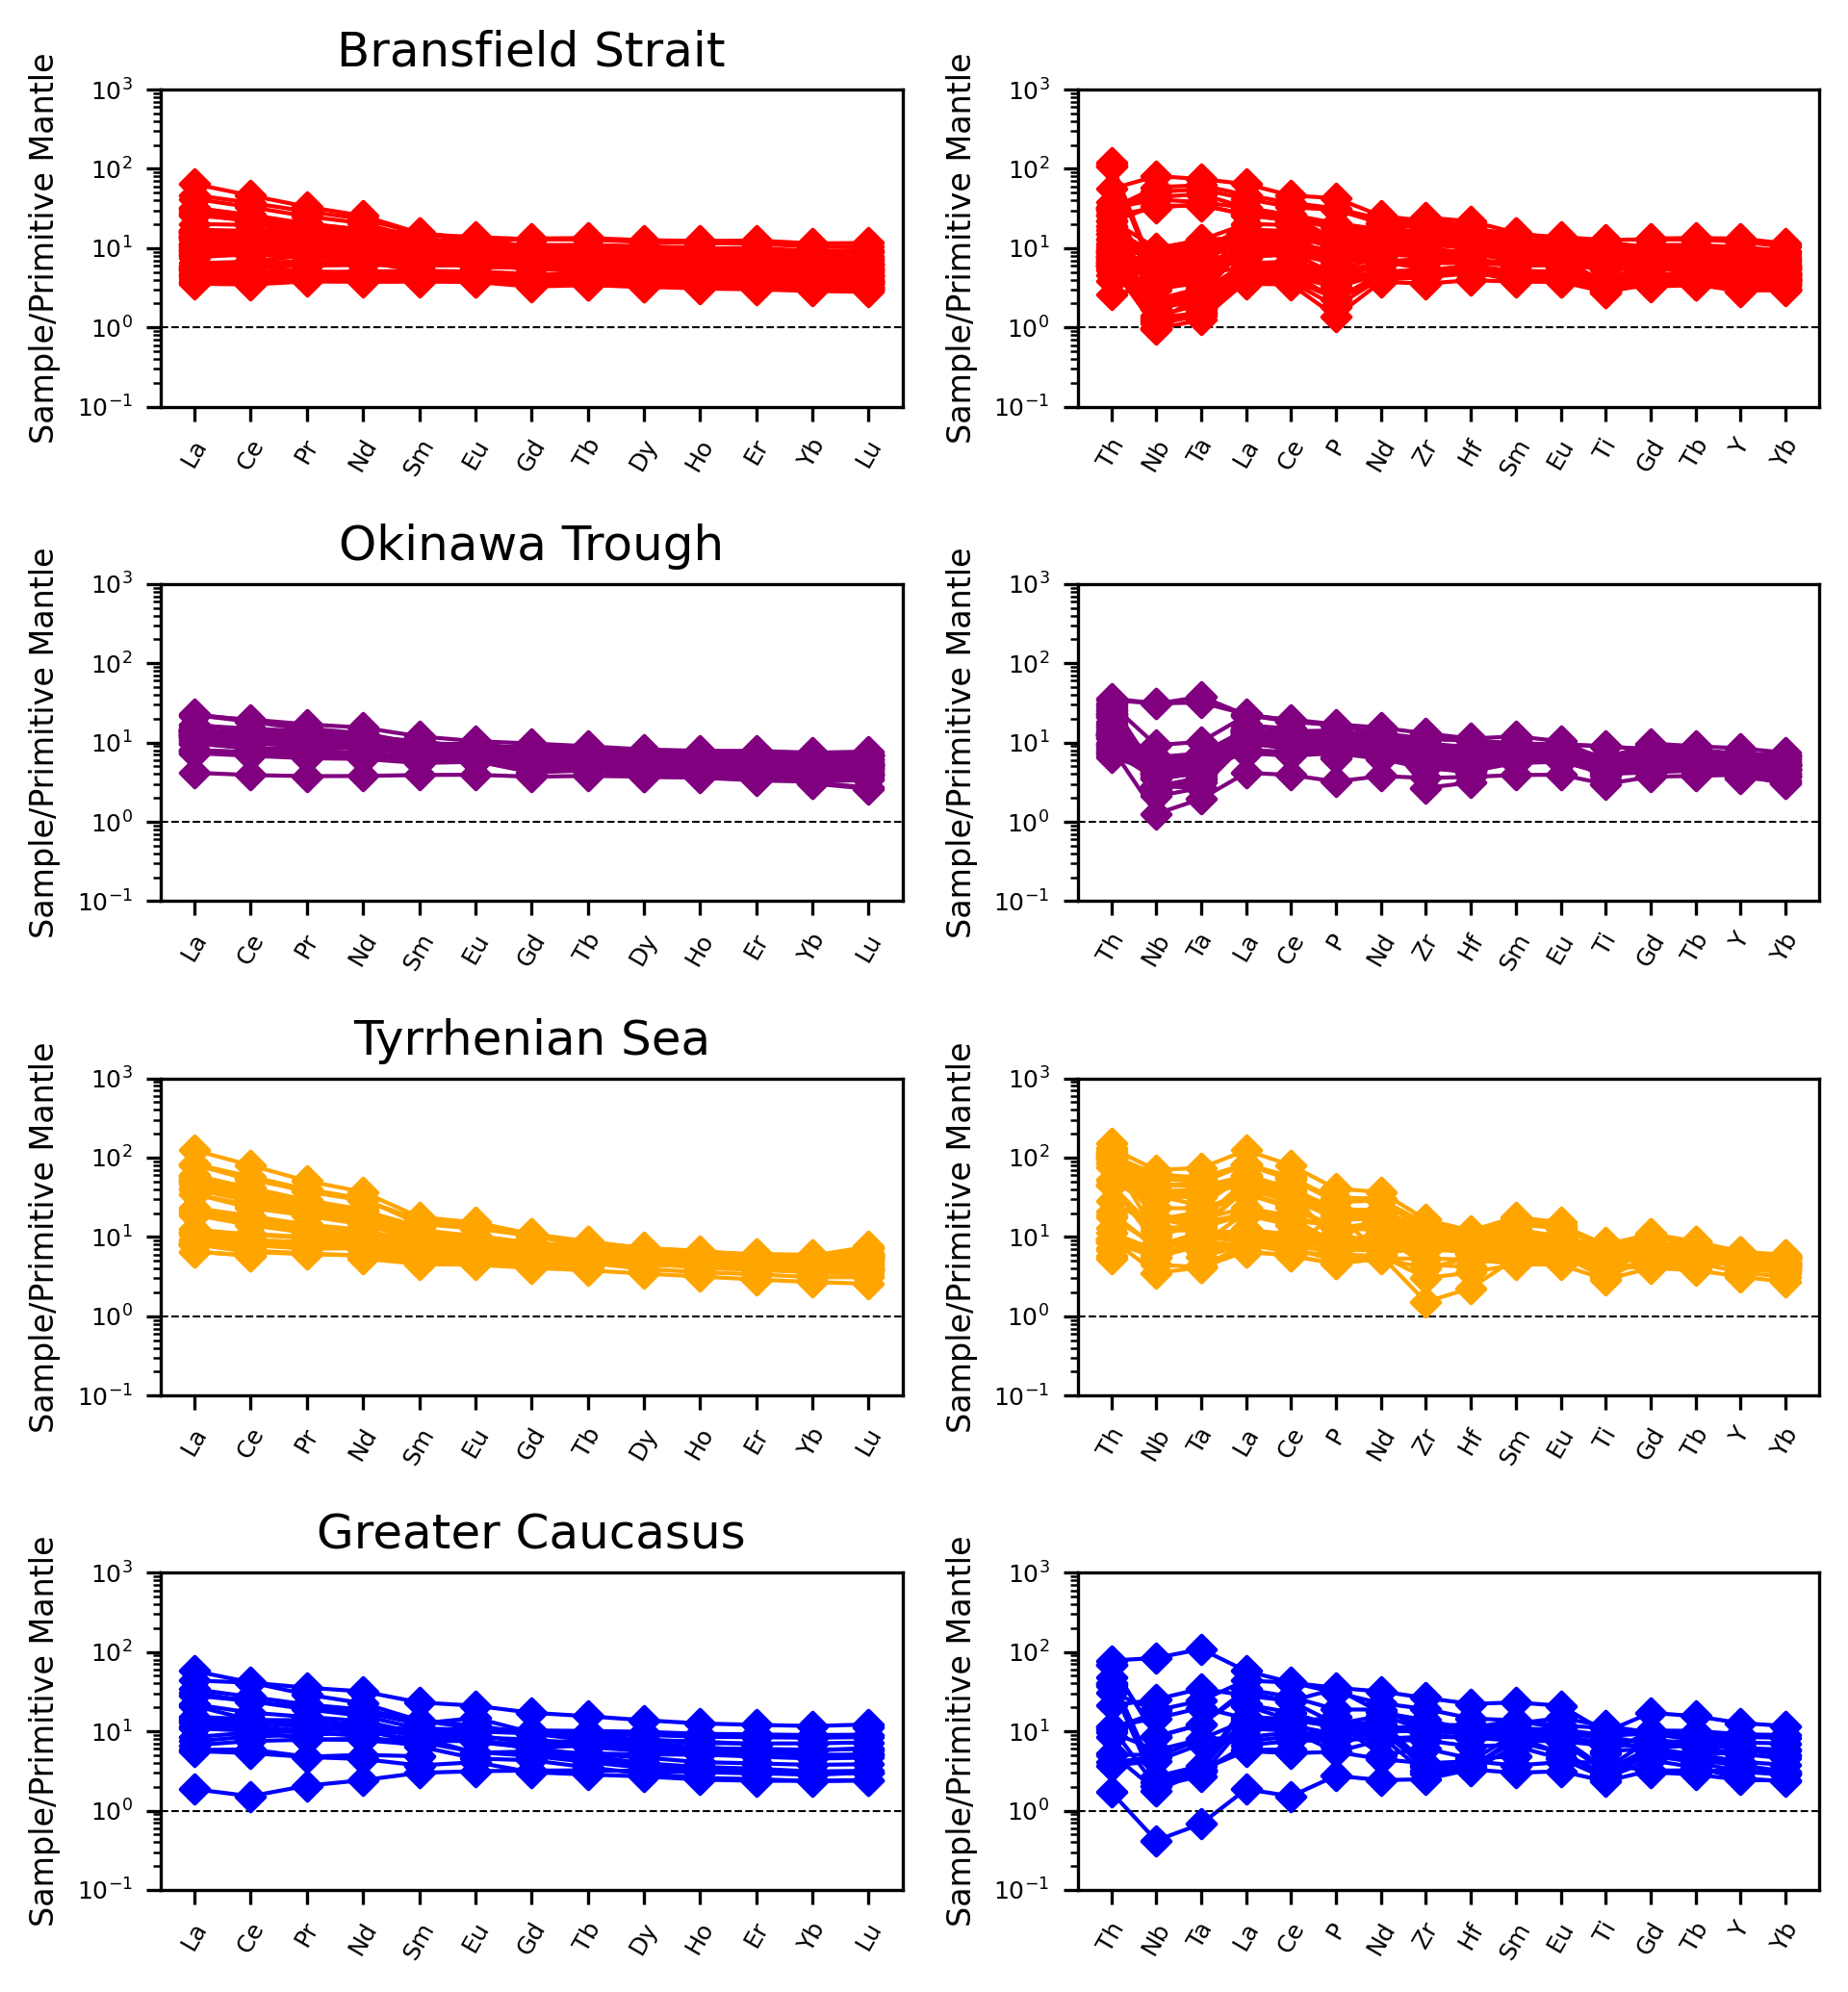

In [15]:
fig,axs = plt.subplots(4,2,figsize=(6.5,7),dpi=300)


for k, group in groups:

    ax0 = axs[(axes_dict[k],0)]
    ax1 = axs[(axes_dict[k],1)]

    ax0.set_title(k)

    gp.REE(group,ax=ax0,c=color_dict[k])
    gp.immobile(group,ax=ax1,c=color_dict[k])

plt.tight_layout()

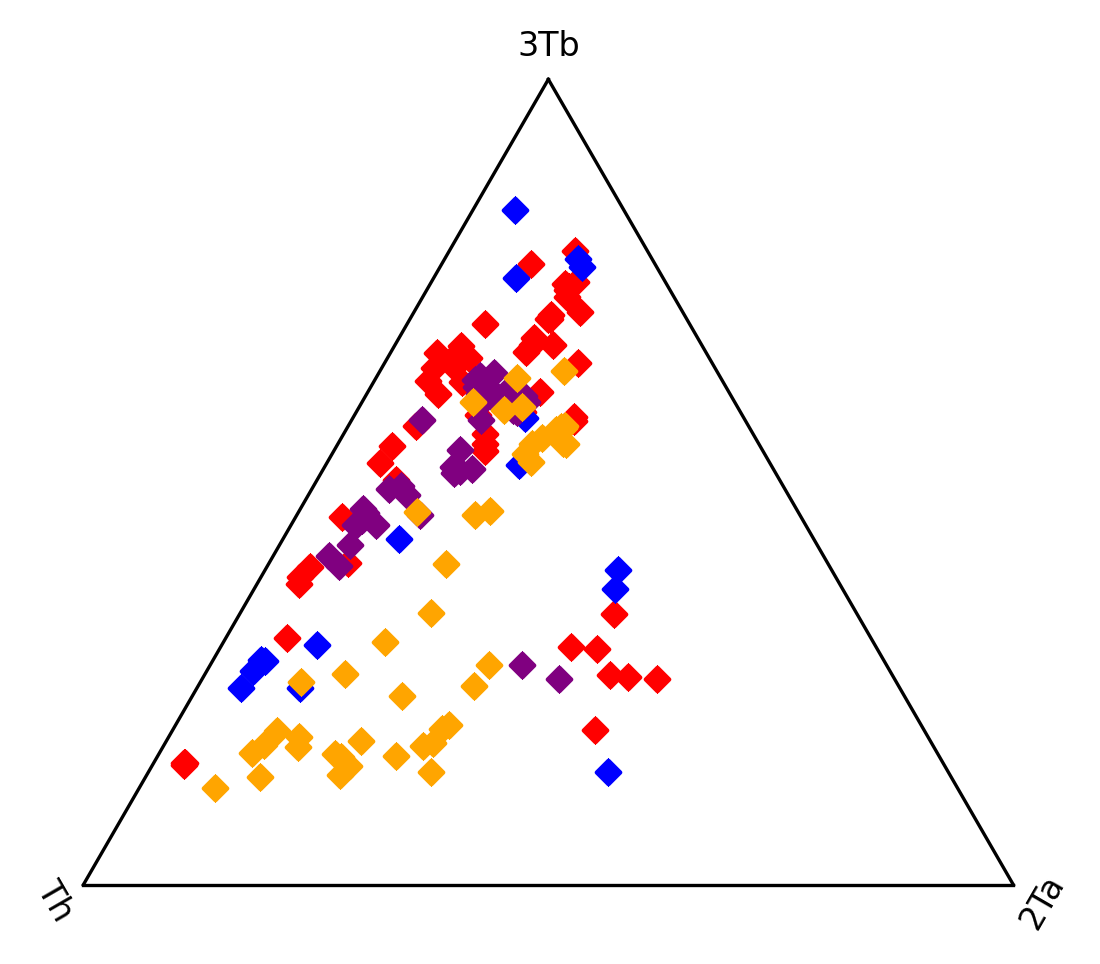

In [16]:
# Ternary
fig = plt.figure(figsize=(4,4),dpi=300)
ax = fig.add_subplot(111,projection='ternary')

for k,group in groups:
    Tb,Th,Ta = group[['Tb','Th','Ta']].T.values
    gp.cabanis(Tb,Th,Ta,ax=ax,label=k,c=color_dict[k])